In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from statsmodels.stats.weightstats import _zconfint_generic
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле scipy.stats.

### Сгенерируйте примеры из распределения

In [27]:
gumb_rv = sts.gumbel_r()
sample = gumb_rv.rvs(100)
sample

array([ 3.25848339e+00, -1.48704448e+00, -5.31260081e-01,  2.71809457e+00,
        1.43744139e-01,  2.64197289e-01,  1.92962912e+00,  9.83028846e-01,
        3.87232837e-02,  1.62551257e-01, -9.12641414e-01,  2.67883119e+00,
       -3.49799475e-02,  6.96203764e-02,  4.47277258e-02,  9.67473228e-01,
       -4.40513128e-02,  5.21870472e+00,  1.11043250e+00, -1.32653919e+00,
        3.96423514e-01,  4.93151592e+00, -9.01927186e-02,  3.11476416e+00,
        1.64082848e-02, -4.39741400e-01,  1.32747981e-01,  8.88543074e-01,
        1.59109717e+00,  4.99562482e-01,  7.66928411e-01,  5.42385368e-01,
        1.03804134e+00,  8.04520778e-01, -7.45087167e-01, -7.61065328e-01,
       -1.31933155e-01,  1.15591018e+00, -6.87872801e-01, -6.12024267e-01,
        2.07016564e-01, -4.80799513e-01,  5.72091575e-02,  3.53824747e+00,
       -6.21512126e-01,  2.44022872e+00,  2.37326210e-01, -5.77063645e-02,
       -1.22275964e-02,  3.49614244e-01,  3.48183200e+00,  2.95913946e+00,
       -6.76196924e-01, -

In [28]:
sample.dtype

dtype('float64')

In [29]:
real_mean = gumb_rv.mean()
real_mean

0.5772156649015329

In [30]:
real_var = gumb_rv.var()
real_var

1.6449340668482264

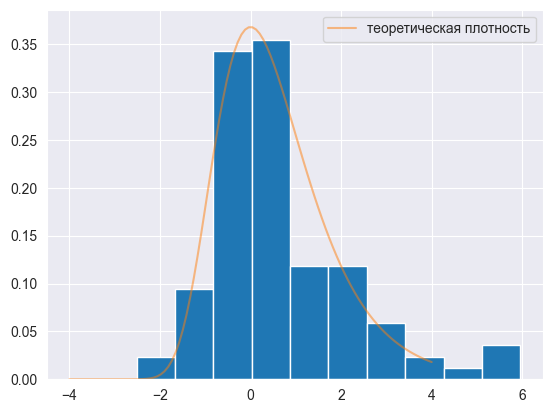

In [31]:
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = gumb_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [32]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.6178558008640512
2.3350712725975287


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [69]:
def build_graf(N):
    plt.figure(figsize=(16,5))
    means = []
    gumb_rv = sts.gumbel_r()
    for i in range(1000):
        means.append(gumb_rv.rvs(N).mean())

    x = np.linspace(-4,4,N)
    Norm = sts.norm(gumb_rv.mean(), math.sqrt(gumb_rv.var()/N))
    fun = Norm.pdf(x)

    plt.hist(means, density=True)
    plt.plot(x, fun, label='теоретическая плотность', alpha=0.5)

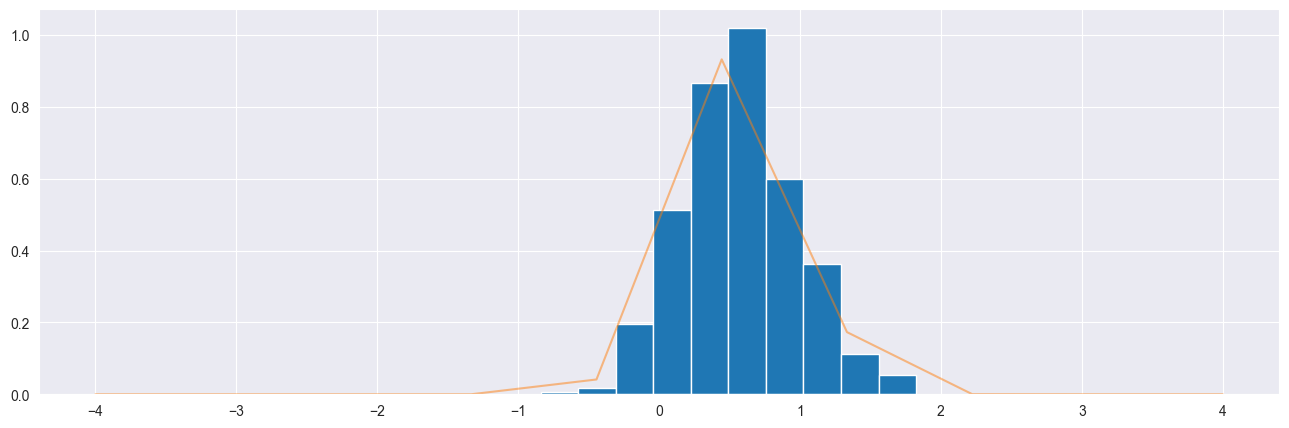

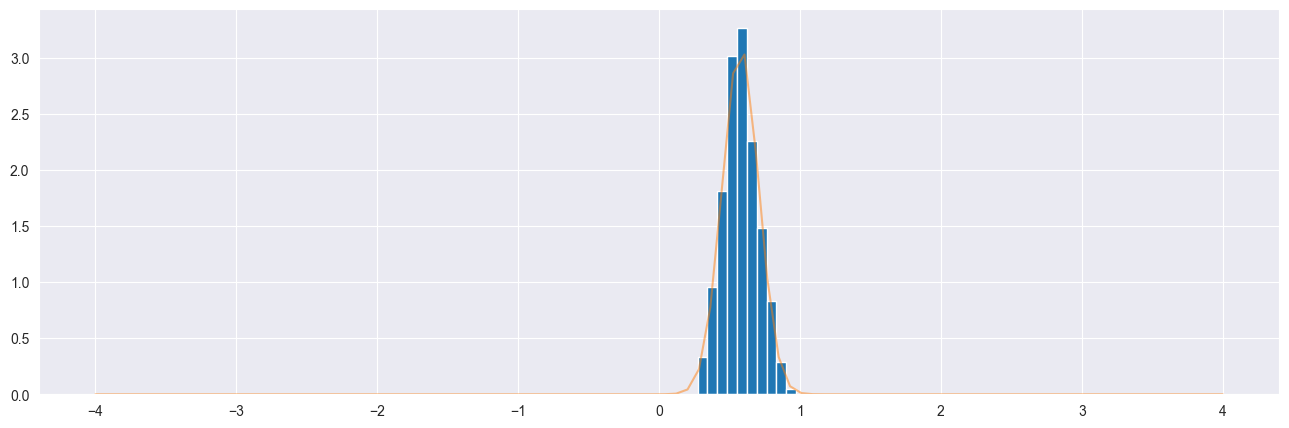

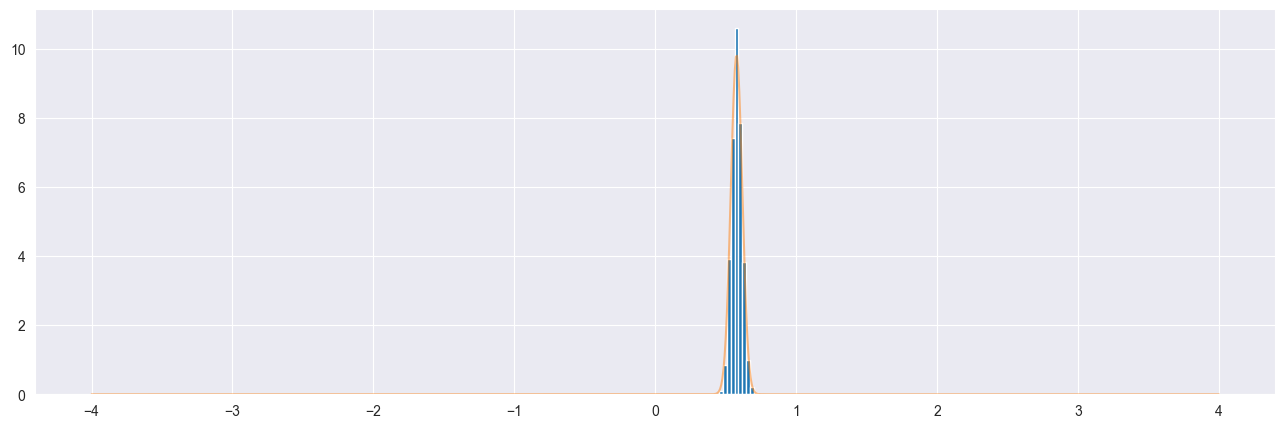

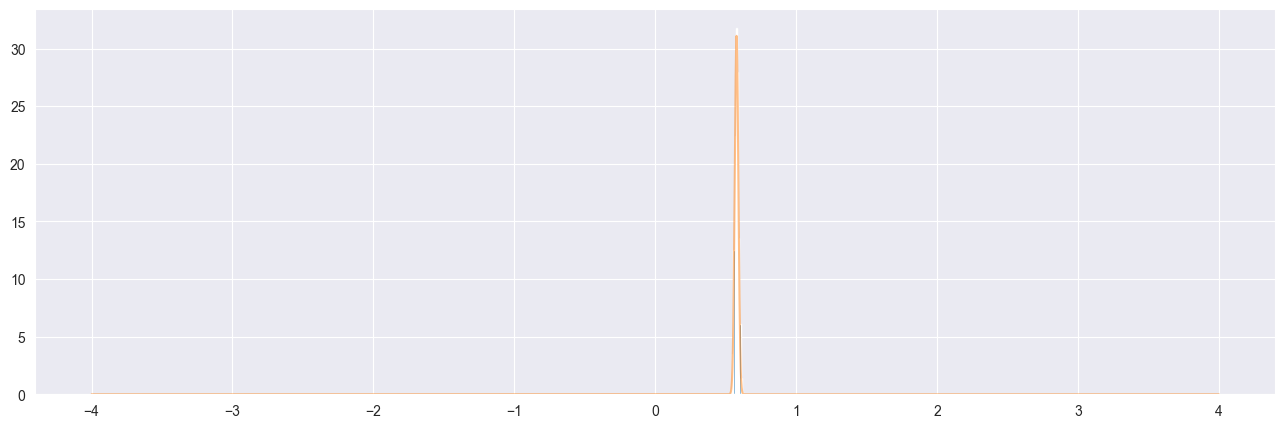

In [70]:
for N in [10, 100, 1000, 10000]:
    build_graf(N)

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций from statsmodels.stats.weightstats import _zconfint_generic. Сравните результаты.

Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [71]:
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [81]:
data = df[['churn', 'total day calls']]
data

,churn,total day calls
0,False,110
1,False,123
2,False,114
3,False,71
4,False,113
...,...,...
3328,False,77
3329,False,57
3330,False,109
3331,False,105


In [92]:
def count_mean(data, val):
    return data[data['churn'] == val]["total day calls"].mean()

In [93]:
def count_var(data, val):
    return data[data['churn'] == val]["total day calls"].var(ddof=1)

In [94]:
def len_val(data, val):
    return len(data[data['churn'] == val]["total day calls"])

In [102]:
def interval(var, mean, size, alfa):
    deviation = (var/size)**(1/2)
    q = sts.norm.ppf(1-alfa/2)

    interval = [mean-q*deviation, mean+q*deviation]
    print(f"{interval[0]}<= x <={interval[1]} with probability {(1-alfa)*100}%")

In [103]:
mean_true = count_mean(data, True)
var_true = count_var(data, True)
len_true = len_val(data, True)

In [104]:
print(mean_true, var_true)

101.33540372670808 465.7959846395711


In [105]:
interval(var_true, mean_true, len_true, 0.05)

99.41066229112079<= x <=103.26014516229537 with probability 95.0%


In [110]:
_zconfint_generic(mean_true, (var_true/len_true)**(1/2), 0.05, '2s')

(99.41066229112079, 103.26014516229537)

In [106]:
mean_false = count_mean(data, False)
var_false = count_var(data, False)
len_false = len_val(data, False)

In [108]:
print(mean_false, var_false)

100.28315789473685 392.0858166300271


In [107]:
interval(var_false, mean_false, len_false, 0.05)

99.55618833318324<= x <=101.01012745629045 with probability 95.0%


In [111]:
_zconfint_generic(mean_false, (var_false/len_false)**(1/2), 0.05, '2s')

(99.55618833318324, 101.01012745629045)